In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
t1 = pd.read_csv("dengue_features_train.csv")
t2=pd.read_csv("dengue_labels_train.csv") 

In [3]:
t3=pd.read_csv("dengue_features_test.csv") 

In [4]:
t3.head() 

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [5]:
data=pd.merge(t1,t2) 

In [6]:
data.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4,4


In [7]:
sj_data=data[data['city']=='sj']
iq_data=data[data['city']=='iq'] 

In [8]:
test_sj=t3[t3['city']=='sj']
test_iq=t3[t3['city']=='iq'] 

In [13]:
sj_data=sj_data.reset_index(drop=True) 
iq_data=iq_data.reset_index(drop=True)  

In [14]:
test_sj=test_sj.reset_index(drop=True) 
test_iq=test_iq.reset_index(drop=True)

In [18]:
iq_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
1,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
2,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
3,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
4,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [19]:
sj_data.shape,iq_data.shape 

((936, 25), (520, 25))

In [21]:
test_sj.shape,test_iq.shape,t3.shape

((260, 24), (156, 24), (416, 24))

In [22]:
sj_data.isnull().sum() 

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [24]:
test_iq.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
precipitation_amt_mm                      0
reanalysis_air_temp_k                     0
reanalysis_avg_temp_k                     0
reanalysis_dew_point_temp_k               0
reanalysis_max_air_temp_k                 0
reanalysis_min_air_temp_k                 0
reanalysis_precip_amt_kg_per_m2           0
reanalysis_relative_humidity_percent      0
reanalysis_sat_precip_amt_mm              0
reanalysis_specific_humidity_g_per_kg     0
reanalysis_tdtr_k                         0
station_avg_temp_c                       10
station_diur_temp_rng_c                  10
station_max_temp_c                        1
station_min_temp_c              

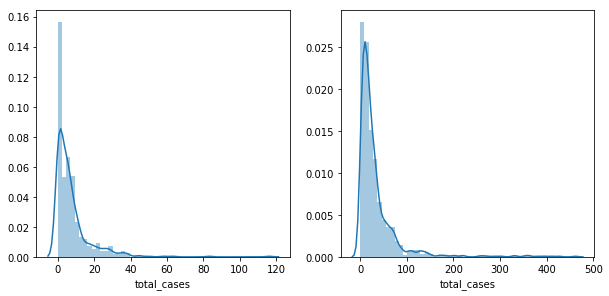

In [25]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(221) 
sns.distplot(iq_data['total_cases'])
ax=fig.add_subplot(222)
sns.distplot(sj_data['total_cases'])

In [26]:
sj_data['total_cases'].skew(),sj_data['total_cases'].kurt() 

(4.478950519684855, 25.37213526462635)

In [27]:
iq_data['total_cases'].skew(),iq_data['total_cases'].kurt()

(3.9975698535509543, 26.736070203183033)

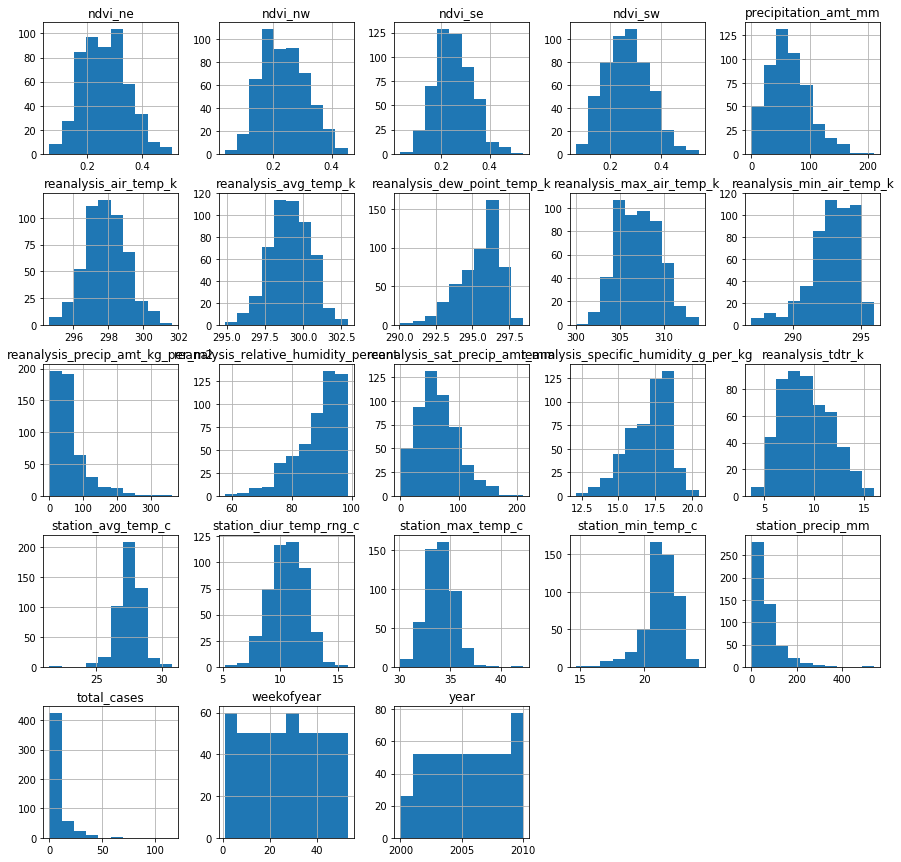

In [28]:
iq_data.hist(figsize=(15,15))
plt.show()

In [29]:
sj_data.dropna(subset=[ 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],how='all',inplace=True)


In [30]:
iq_data.dropna(subset=[ 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],how='all',inplace=True)


In [31]:
sj_data.dropna(subset=[ 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],thresh=15,inplace=True)


In [32]:
iq_data.dropna(subset=[ 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],thresh=15,inplace=True)


In [33]:
sj_data.reset_index(drop=True)
iq_data.reset_index(drop=True)
iq_data.shape,sj_data.shape

((516, 25), (930, 25))

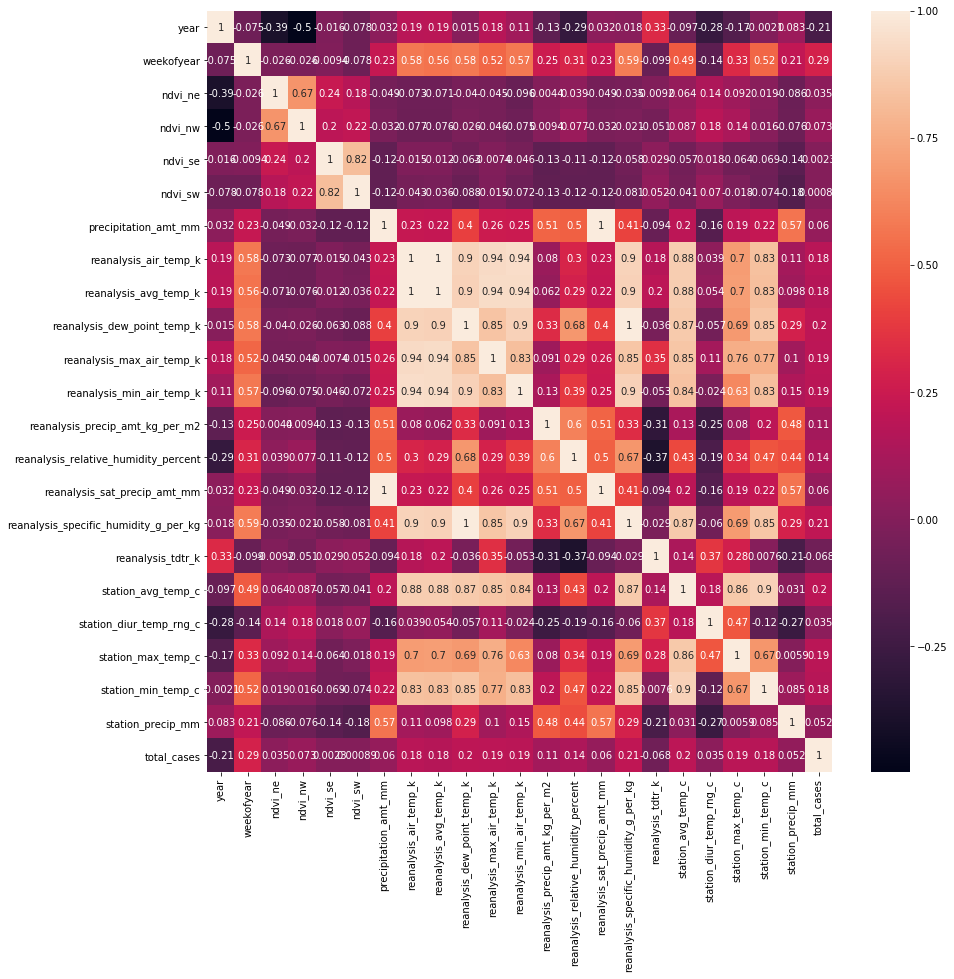

In [34]:
f=plt.subplots(figsize=(14,14))
sns.heatmap(sj_data.corr(),annot=True)

In [35]:
au_corr = sj_data.corr().abs().unstack()
au_corr = au_corr.sort_values(ascending=False)
c=pd.DataFrame(au_corr)
c=c[(c[0]>0.9)]
c=c.reset_index()
c=c[c['level_0']!=c['level_1']]
c

,level_0,level_1,0
8,reanalysis_sat_precip_amt_mm,precipitation_amt_mm,1.000000
15,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,1.000000
25,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,0.998532
26,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,0.998532
27,reanalysis_avg_temp_k,reanalysis_air_temp_k,0.997495
28,reanalysis_air_temp_k,reanalysis_avg_temp_k,0.997495
29,reanalysis_min_air_temp_k,reanalysis_air_temp_k,0.942254
30,reanalysis_air_temp_k,reanalysis_min_air_temp_k,0.942254
31,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,0.939120
32,reanalysis_avg_temp_k,reanalysis_min_air_temp_k,0.939120


In [36]:
del_col=['precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_dew_point_temp_k']
sj_data.drop(columns=del_col,inplace=True)

In [37]:
test_sj.drop(columns=del_col,inplace=True) 

In [38]:
iq_corr = iq_data.corr().abs().unstack()
iq_corr = iq_corr.sort_values(ascending=False)
i=pd.DataFrame(iq_corr)
i=i[(i[0]>0.9)]
i=i.reset_index()
i=i[i['level_0']!=i['level_1']]
i

,level_0,level_1,0
8,reanalysis_sat_precip_amt_mm,precipitation_amt_mm,1.000000
15,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,1.000000
25,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,0.997775
26,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,0.997775
27,reanalysis_avg_temp_k,reanalysis_air_temp_k,0.973319
28,reanalysis_air_temp_k,reanalysis_avg_temp_k,0.973319


In [39]:
iq_data.drop(columns=del_col,inplace=True) 

In [40]:
test_iq.drop(columns=del_col,inplace=True) 

In [41]:
iq_data.shape,sj_data.shape

((516, 22), (930, 22))

In [42]:
test_sj.shape,test_sj.shape

((260, 21), (260, 21))

In [43]:
iq_data.isnull().sum() 

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   1
ndvi_nw                                   1
ndvi_se                                   1
ndvi_sw                                   1
reanalysis_avg_temp_k                     0
reanalysis_max_air_temp_k                 0
reanalysis_min_air_temp_k                 0
reanalysis_precip_amt_kg_per_m2           0
reanalysis_relative_humidity_percent      0
reanalysis_sat_precip_amt_mm              0
reanalysis_specific_humidity_g_per_kg     0
reanalysis_tdtr_k                         0
station_avg_temp_c                       33
station_diur_temp_rng_c                  33
station_max_temp_c                       10
station_min_temp_c                        4
station_precip_mm                        12
total_cases                               0
dtype: int64

In [44]:
test_sj.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
reanalysis_avg_temp_k                     2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                        2
station_diur_temp_rng_c                   2
station_max_temp_c                        2
station_min_temp_c                        2
station_precip_mm                         2
dtype: int64

In [45]:
l=list(iq_data[iq_data['ndvi_ne'].isna()].index)
m=list(iq_data[iq_data['ndvi_nw'].isna()].index)
n=list(iq_data[iq_data['ndvi_sw'].isna()].index)
o=list(iq_data[iq_data['ndvi_se'].isna()].index)
veg=set(l).intersection(m).intersection(n).intersection(o)
veg
iq_data.drop(veg,inplace=True)
iq_data=iq_data.reset_index(drop=True)

In [46]:
sj_data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  188
ndvi_nw                                   46
ndvi_se                                   16
ndvi_sw                                   16
reanalysis_avg_temp_k                      0
reanalysis_max_air_temp_k                  0
reanalysis_min_air_temp_k                  0
reanalysis_precip_amt_kg_per_m2            0
reanalysis_relative_humidity_percent       0
reanalysis_sat_precip_amt_mm               3
reanalysis_specific_humidity_g_per_kg      0
reanalysis_tdtr_k                          0
station_avg_temp_c                         0
station_diur_temp_rng_c                    0
station_max_temp_c                         0
station_min_temp_c                         0
station_precip_mm                          0
total_cases                                0
dtype: int

In [47]:
l=list(sj_data[sj_data['ndvi_ne'].isna()].index)
m=list(sj_data[sj_data['ndvi_nw'].isna()].index)
n=list(sj_data[sj_data['ndvi_sw'].isna()].index)
o=list(sj_data[sj_data['ndvi_se'].isna()].index) 
p=list(sj_data[sj_data['reanalysis_sat_precip_amt_mm'].isna()].index)
veg=set(l).intersection(m).intersection(n).intersection(o)
len(veg) 

16

In [48]:
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

c:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [49]:
sj_data.drop(columns=['city','week_start_date'],inplace=True) 

In [50]:
test_sj.drop(columns=['city','week_start_date'],inplace=True) 

In [51]:
# scaler=StandardScaler() 
sj_data_cols=list(sj_data.columns) 
# sj_scale=scaler.fit_transform(sj_data) 
sj_train = pd.DataFrame(KNN(k=3).fit_transform(sj_data)) 
sj_train.columns=sj_data_cols

Imputing row 1/930 with 0 missing, elapsed time: 0.338
Imputing row 101/930 with 0 missing, elapsed time: 0.338
Imputing row 201/930 with 0 missing, elapsed time: 0.344
Imputing row 301/930 with 1 missing, elapsed time: 0.347
Imputing row 401/930 with 0 missing, elapsed time: 0.348
Imputing row 501/930 with 0 missing, elapsed time: 0.348
Imputing row 601/930 with 0 missing, elapsed time: 0.353
Imputing row 701/930 with 0 missing, elapsed time: 0.355
Imputing row 801/930 with 0 missing, elapsed time: 0.355
Imputing row 901/930 with 0 missing, elapsed time: 0.358


In [52]:
test_sj_cols=list(test_sj.columns) 
test_sj_train = pd.DataFrame(KNN(k=3).fit_transform(test_sj))  
test_sj_train.columns=test_sj_cols 

Imputing row 1/260 with 0 missing, elapsed time: 0.027
Imputing row 101/260 with 0 missing, elapsed time: 0.029
Imputing row 201/260 with 0 missing, elapsed time: 0.029


In [53]:
sj_train.isna().sum() 

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
reanalysis_avg_temp_k                    0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
dtype: int64

In [54]:
test_sj_train.isnull().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
reanalysis_avg_temp_k                    0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

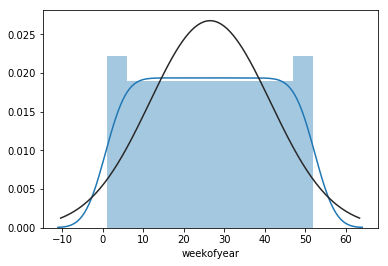

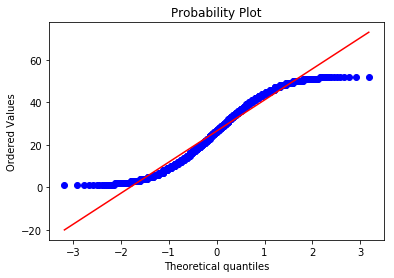

In [56]:
from scipy import stats
from scipy.stats import norm
sns.distplot(sj_train['weekofyear'],fit=norm) 
fig=plt.figure()
res=stats.probplot(sj_train['weekofyear'],plot=plt,fit=norm) 

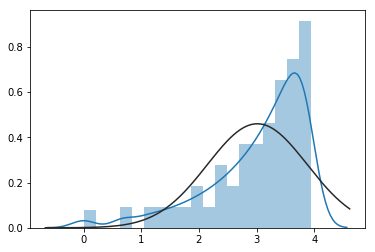

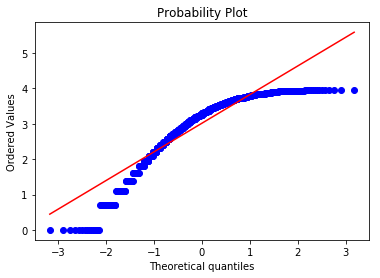

In [57]:
#sns.lmplot('ndvi_sw','total_cases',sj_train) 
a2=boxcox(sj_train['weekofyear'],0)  
sns.distplot(a2,fit=norm) 
fig=plt.figure()
res=stats.probplot(a2,plot=plt,fit=norm)


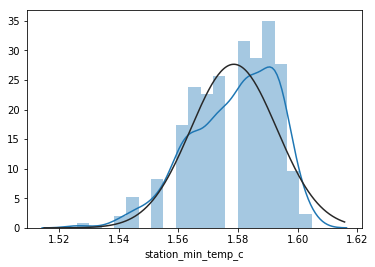

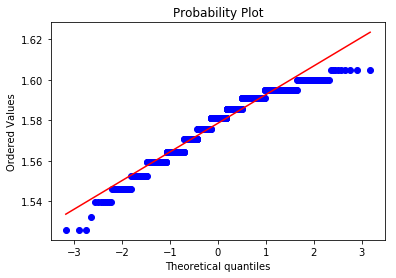

In [58]:
sj_train['station_min_temp_c']=boxcox(sj_train['station_min_temp_c'],-0.5)  
sns.distplot(sj_train['station_min_temp_c'],fit=norm) 
fig=plt.figure() 
res=stats.probplot(sj_train['station_min_temp_c'],plot=plt,fit=norm)

In [59]:
sj_train['reanalysis_min_air_temp_k']=boxcox(sj_train['reanalysis_min_air_temp_k'],-0.5)
sj_train['reanalysis_specific_humidity_g_per_kg']=boxcox(sj_train['reanalysis_specific_humidity_g_per_kg'],0.5)
sj_train['reanalysis_tdtr_k']=boxcox(sj_train['reanalysis_tdtr_k'],0)
sj_train['station_avg_temp_c']=boxcox(sj_train['station_avg_temp_c'],0) 

In [60]:
test_sj_train['reanalysis_min_air_temp_k']=boxcox(test_sj_train['reanalysis_min_air_temp_k'],-0.5)
test_sj_train['reanalysis_specific_humidity_g_per_kg']=boxcox(test_sj_train['reanalysis_specific_humidity_g_per_kg'],0.5)
test_sj_train['reanalysis_tdtr_k']=boxcox(test_sj_train['reanalysis_tdtr_k'],0)
test_sj_train['station_avg_temp_c']=boxcox(test_sj_train['station_avg_temp_c'],0)  

In [61]:
sj_train.head(5) 

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990.0,18.0,0.122600,0.103725,0.198483,0.177617,297.742857,299.8,1.883733,32.00,73.365714,12.42,5.486750,0.966441,3.236435,6.900000,29.4,1.552786,16.0,4.0
1,1990.0,19.0,0.169900,0.142175,0.162357,0.155486,298.442857,300.9,1.883831,17.94,77.368571,22.82,5.841647,0.863493,3.285198,6.371429,31.7,1.575524,8.6,5.0
2,1990.0,20.0,0.032250,0.172967,0.157200,0.170843,298.878571,300.5,1.884007,26.10,82.052857,34.54,6.209402,0.832909,3.285198,6.485714,32.2,1.581146,41.4,4.0
3,1990.0,21.0,0.128633,0.245067,0.227557,0.235886,299.228571,301.4,1.883948,13.90,80.337143,15.36,6.166482,0.887303,3.313147,6.771429,33.3,1.585665,4.0,3.0
4,1990.0,22.0,0.196200,0.262200,0.251200,0.247340,299.664286,301.9,1.884046,12.20,80.460000,7.52,6.296987,1.103363,3.365323,9.371429,35.0,1.590899,5.8,6.0


In [62]:
test_sj_train.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,2008.0,18.0,-0.018900,-0.018900,0.102729,0.091200,298.550000,301.1,1.883831,25.37,78.781429,78.60,5.979617,1.140576,3.278222,7.057143,33.3,21.7,75.2
1,2008.0,19.0,-0.018000,-0.012400,0.082043,0.072314,298.557143,300.8,1.883890,21.83,78.230000,12.56,5.947686,0.944462,3.260840,5.557143,30.0,22.2,34.3
2,2008.0,20.0,-0.001500,-0.069515,0.151083,0.091529,299.357143,302.2,1.883831,4.12,78.270000,3.66,6.166832,1.488077,3.329650,7.785714,32.8,22.8,3.0
3,2008.0,21.0,-0.036072,-0.019867,0.124329,0.125686,299.728571,303.0,1.883929,2.20,73.015714,0.00,5.943731,1.468532,3.334243,6.271429,33.3,24.4,0.3
4,2008.0,22.0,0.056800,0.039833,0.062267,0.075914,299.671429,302.3,1.884007,4.36,74.084286,0.76,6.034213,1.264934,3.318333,7.085714,33.3,23.3,84.1


In [63]:
scaler=StandardScaler() 
sj_train_scale=pd.DataFrame(scaler.fit_transform(sj_train.iloc[:,0:-1]),columns=sj_train.columns[0:-1]) 

In [66]:
test_sj_train_scale=pd.DataFrame(scaler.transform(test_sj_train) ,columns=test_sj_train.columns)  

In [67]:
sj_train_scale.head() 

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,-1.694303,-0.569831,0.639475,0.388324,0.370855,0.208149,-1.259512,-1.270668,-1.081959,0.043095,-1.535709,-0.514884,-1.648082,0.323182,-1.100512,0.170699,-1.286409,-1.788937,-0.367979
1,-1.694303,-0.502792,1.112940,0.811571,-0.265308,-0.189658,-0.684791,-0.396437,-0.694001,-0.351750,-0.354111,-0.281455,-0.735436,-0.208143,-0.179270,-0.461909,0.053626,-0.212064,-0.620452
2,-1.694303,-0.435753,-0.264912,1.150517,-0.356122,0.086389,-0.327056,-0.714339,0.001855,-0.122594,1.028637,-0.018397,0.210276,-0.365987,-0.179270,-0.325129,0.344938,0.177865,0.498618
3,-1.694303,-0.368714,0.699868,1.944173,0.882830,1.255539,-0.039696,0.000940,-0.229746,-0.465205,0.522177,-0.448895,0.099903,-0.085254,0.348726,0.016822,0.985825,0.491233,-0.777395
4,-1.694303,-0.301675,1.376198,2.132771,1.299169,1.461431,0.318039,0.398317,0.156061,-0.512945,0.558443,-0.624865,0.435509,1.029852,1.334456,3.128570,1.976285,0.854215,-0.715983


In [100]:
test_sj_train_scale.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1.759921,-0.569831,-0.776914,-0.961496,-1.315336,-1.345199,-0.596823,-0.237486,-0.694001,-0.143094,0.062948,0.970536,-0.380635,1.221916,-0.311064,0.358772,0.985825,1395.460709,1.651807
1,1.759921,-0.502792,-0.767905,-0.889946,-1.679601,-1.684671,-0.590959,-0.475913,-0.461697,-0.242507,-0.099827,-0.511742,-0.462748,0.209747,-0.639451,-1.436467,-0.936834,1430.136711,0.256380
2,1.759921,-0.435753,-0.602743,-1.518646,-0.463834,-1.339293,0.065865,0.636744,-0.694001,-0.739855,-0.088020,-0.711504,0.100803,3.015401,0.660515,1.230746,0.694513,1471.747914,-0.811513
3,1.759921,-0.368714,-0.948806,-0.972137,-0.934971,-0.725316,0.370819,1.272548,-0.307024,-0.793774,-1.639025,-0.793653,-0.472920,2.914530,0.747287,-0.581591,0.985825,1582.711121,-0.903632
4,1.759921,-0.301675,-0.019171,-0.314977,-2.027849,-1.619961,0.323903,0.716219,0.001855,-0.733115,-1.323595,-0.776595,-0.240238,1.863735,0.446714,0.392967,0.985825,1506.423916,1.955457


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [70]:
sj_x_train,sj_x_test,sj_y_train,sj_y_test=train_test_split( sj_train_scale,sj_train.iloc[:,-1] ) 

In [71]:
clf=RandomForestRegressor(n_estimators=100,criterion='mae',warm_start=True)
#clf=SVR( C=0.4,epsilon=0.3 )
clf.fit( sj_x_train , sj_y_train ) 

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True)

In [72]:
mean_absolute_error(sj_y_test,clf.predict(sj_x_test)) 

17.064356223175967

In [73]:
iq_data.isna().sum() 

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
reanalysis_avg_temp_k                     0
reanalysis_max_air_temp_k                 0
reanalysis_min_air_temp_k                 0
reanalysis_precip_amt_kg_per_m2           0
reanalysis_relative_humidity_percent      0
reanalysis_sat_precip_amt_mm              0
reanalysis_specific_humidity_g_per_kg     0
reanalysis_tdtr_k                         0
station_avg_temp_c                       33
station_diur_temp_rng_c                  33
station_max_temp_c                       10
station_min_temp_c                        4
station_precip_mm                        12
total_cases                               0
dtype: int64

In [74]:
l=list(iq_data[iq_data['station_avg_temp_c'].isna()].index)
m=list(iq_data[iq_data['station_diur_temp_rng_c'].isna()].index)
n=list(iq_data[iq_data['station_max_temp_c'].isna()].index)
o=list(iq_data[iq_data['station_min_temp_c'].isna()].index) 
p=list(iq_data[iq_data['station_precip_mm'].isna()].index)
tem=set(l).intersection(m).intersection(n) 
len(tem)

10

In [75]:
iq_data.drop(columns=['city','week_start_date'],inplace=True) 

In [76]:
test_iq.drop(columns=['city','week_start_date'],inplace=True) 

In [77]:
iq_data_cols=list(iq_data.columns)  
iq_train = pd.DataFrame(KNN(k=3).fit_transform(iq_data)) 
iq_train.columns=iq_data_cols

Imputing row 1/515 with 0 missing, elapsed time: 0.082
Imputing row 101/515 with 0 missing, elapsed time: 0.084
Imputing row 201/515 with 0 missing, elapsed time: 0.084
Imputing row 301/515 with 0 missing, elapsed time: 0.087
Imputing row 401/515 with 0 missing, elapsed time: 0.088
Imputing row 501/515 with 0 missing, elapsed time: 0.088


In [78]:
test_iq_cols=list(test_iq.columns)  
test_iq_train = pd.DataFrame(KNN(k=3).fit_transform(test_iq)) 
test_iq_train.columns=test_iq_cols

Imputing row 1/156 with 0 missing, elapsed time: 0.010
Imputing row 101/156 with 0 missing, elapsed time: 0.014


In [79]:
iq_train.isna().sum() 

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
reanalysis_avg_temp_k                    0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
dtype: int64

In [80]:
test_iq_train.isnull().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
reanalysis_avg_temp_k                    0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

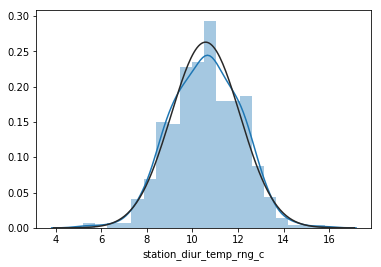

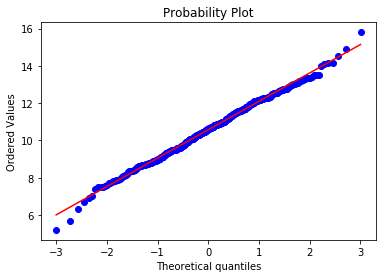

In [81]:
sns.distplot(iq_train['station_diur_temp_rng_c'],fit=norm) 
fig=plt.figure()
res=stats.probplot(iq_train['station_diur_temp_rng_c'],plot=plt,fit=norm) 

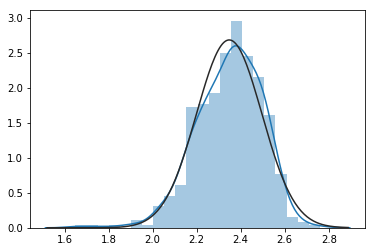

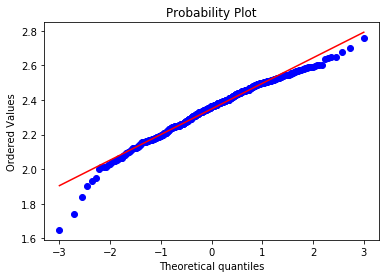

In [82]:
a1=boxcox(iq_train['station_diur_temp_rng_c'],0)   
sns.distplot(a1,fit=norm) 
fig=plt.figure()
res=stats.probplot(a1,plot=plt,fit=norm)


In [83]:
iq_train['ndvi_ne'] = boxcox(iq_train['ndvi_ne'],0.5) 
iq_train['ndvi_se'] = boxcox(iq_train['ndvi_se'],0.5)
iq_train['ndvi_nw'] = boxcox(iq_train['ndvi_nw'],0.5) 
iq_train['ndvi_sw'] = boxcox(iq_train['ndvi_sw'],0.5) 
iq_train['reanalysis_max_air_temp_k'] = boxcox(iq_train['reanalysis_max_air_temp_k'],0.5) 
iq_train['reanalysis_min_air_temp_k'] = boxcox(iq_train['reanalysis_min_air_temp_k'],0.5) 
iq_train['reanalysis_specific_humidity_g_per_kg'] = boxcox(iq_train['reanalysis_specific_humidity_g_per_kg'],0.5) 
iq_train['reanalysis_tdtr_k'] = boxcox(iq_train['reanalysis_tdtr_k'],0.5) 
iq_train['station_avg_temp_c'] = boxcox(iq_train['station_avg_temp_c'],0.5) 
iq_train['station_min_temp_c'] = boxcox(iq_train['station_min_temp_c'],0) 

In [84]:
test_iq_train['ndvi_ne'] = boxcox(test_iq_train['ndvi_ne'],0.5) 
test_iq_train['ndvi_se'] = boxcox(test_iq_train['ndvi_se'],0.5)
test_iq_train['ndvi_nw'] = boxcox(test_iq_train['ndvi_nw'],0.5) 
test_iq_train['ndvi_sw'] = boxcox(test_iq_train['ndvi_sw'],0.5) 
test_iq_train['reanalysis_max_air_temp_k'] = boxcox(test_iq_train['reanalysis_max_air_temp_k'],0.5) 
test_iq_train['reanalysis_min_air_temp_k'] = boxcox(test_iq_train['reanalysis_min_air_temp_k'],0.5) 
test_iq_train['reanalysis_specific_humidity_g_per_kg'] = boxcox(test_iq_train['reanalysis_specific_humidity_g_per_kg'],0.5) 

SyntaxError: invalid syntax (<ipython-input-84-3a985efbfb67>, line 8)

In [85]:
test_iq_train['reanalysis_tdtr_k'] = boxcox(test_iq_train['reanalysis_tdtr_k'],0.5) 
test_iq_train['station_avg_temp_c'] = boxcox(test_iq_train['station_avg_temp_c'],0.5) 
test_iq_train['station_min_temp_c'] = boxcox(test_iq_train['station_min_temp_c'],0) 

In [98]:
scaler1=StandardScaler()
iq_train_scale=pd.DataFrame(scaler1.fit_transform(iq_train.iloc[:,0:-1]),columns=iq_train.columns[0:-1]) 
iq_train_scale.head() 

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,-1.71333,-0.036402,-0.848073,-1.476887,1.134556,-0.149018,-0.514993,0.090891,0.143019,-0.287337,0.500799,-1.102980,-0.282031,-0.050717,-1.223756,0.131291,-1.135251,-0.353130,-0.936957
1,-1.71333,0.030791,-0.520154,0.538105,0.555597,-0.214880,-0.531094,-0.203427,-1.060161,-0.231452,0.654283,-0.103501,-0.136832,0.502719,-0.671282,0.652967,-0.001999,-0.275224,-0.098565
2,-1.71333,0.097985,-1.080546,-0.824046,-0.533339,-1.786814,-1.309263,-1.088403,-0.157390,0.141839,0.953520,-0.248028,0.038540,-0.720254,-0.781363,0.587071,-0.757500,-0.353130,-0.377498
3,-1.71333,0.165178,-0.376979,-1.256689,0.128348,-0.732078,-2.184033,-1.468613,-2.569964,-0.669776,-0.183466,-1.665471,-1.866128,0.025833,-1.931123,-0.027958,-1.890753,-5.886401,-0.506604
4,-1.71333,0.232371,0.813278,1.062609,0.130494,1.069053,-1.126796,-0.035205,-0.819195,-0.513857,-0.061094,-0.042454,-1.129305,0.182369,-1.002144,0.595857,-0.530850,-1.653580,-0.921018


In [97]:
test_iq_train_scale=pd.DataFrame(scaler1.transform(test_iq_train),columns=test_iq_train.columns) 
test_iq_train_scale.head() 

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1.719996,-0.036402,7.239039,7.336072,7.811865,6.640780,0.059242,2024.660112,2688.398018,-0.467916,0.522294,0.512087,32.027616,0.153624,-0.080346,0.121406,-0.153099,0.259858,-0.806257
1,1.719996,0.030791,7.907326,8.144200,8.478518,7.643539,0.247076,2023.186841,2672.975439,-0.965306,-0.625439,-1.106104,28.276629,0.441910,-0.533967,-0.626513,-0.757500,0.032702,-0.842917
2,1.719996,0.097985,7.392427,8.730776,7.732931,7.259354,-0.128592,2013.610581,2676.059955,0.068652,0.453095,-0.060058,33.083837,0.205287,-0.616318,-0.148767,-0.455300,0.334872,-0.624553
3,1.719996,0.165178,6.653619,6.842316,7.160997,6.239811,-1.872765,2013.610581,2643.158453,-0.756486,0.045628,-0.467232,25.674231,-0.521448,-0.671282,-0.577091,-0.530850,-6.445821,-0.908267
4,1.719996,0.232371,7.996801,8.489310,7.969462,7.332196,0.649577,2026.133383,2655.496516,-0.769811,-1.321772,-0.225881,25.883065,1.045881,-0.506542,0.839672,-0.379749,-3.631844,-0.936957


In [119]:
iq_x_train,iq_x_test,iq_y_train,iq_y_test=train_test_split( iq_train_scale,iq_train.iloc[:,-1] ) 

In [120]:
clf1=RandomForestRegressor(n_estimators=100,criterion='mae',warm_start=True)
#clf=SVR() 
clf1.fit( iq_x_train , iq_y_train ) 

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True)

In [121]:
mean_absolute_error(iq_y_test,clf1.predict(iq_x_test)) 

5.1960077519379855

In [122]:
clf1.predict(iq_x_test).round().astype(int) 

array([10,  8,  6,  1, 10, 12,  5,  8,  5,  5,  0,  0,  5, 15, 12,  6, 13,
        9, 17,  3, 12, 18,  7,  8, 13,  6, 12,  0, 11,  8,  0,  0, 12, 11,
        6, 13,  0, 18, 17,  3, 24,  0,  7, 10, 14,  0, 10, 16, 18, 15,  0,
       12, 12, 10, 10,  4,  8, 11, 14, 11, 12,  0,  0, 21,  0,  9,  7, 13,
        0, 15,  4, 21,  8, 12,  7,  3,  4, 11,  6, 15, 11,  0,  0,  4, 16,
       10,  5,  0,  0, 21,  7,  4,  7, 12,  7,  4,  7, 17,  9,  0,  0,  9,
        4, 15, 12,  0, 25,  7,  0,  3,  3,  2, 11,  5, 12,  0, 10, 10,  4,
        8, 20,  1, 11,  9,  0,  8,  6, 12, 16])

In [139]:
(iq_y_test==clf1.predict(iq_x_test).astype(int)).sum() , iq_y_test.shape

(30, (129,))

In [140]:
(sj_y_test==clf.predict(sj_x_test).astype(int)).sum() , sj_y_test.shape

(8, (233,))

In [123]:
sj_pred=clf.predict(test_sj_train_scale) 
iq_pred=clf1.predict(test_iq_train_scale) 

In [124]:
sj_pred.shape,iq_pred.shape

((260,), (156,))

In [125]:
t3.shape

(416, 24)

In [126]:
iq_train_scale.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,-1.71333,-0.036402,-0.848073,-1.476887,1.134556,-0.149018,-0.514993,0.090891,0.143019,-0.287337,0.500799,-1.102980,-0.282031,-0.050717,-1.223756,0.131291,-1.135251,-0.353130,-0.936957
1,-1.71333,0.030791,-0.520154,0.538105,0.555597,-0.214880,-0.531094,-0.203427,-1.060161,-0.231452,0.654283,-0.103501,-0.136832,0.502719,-0.671282,0.652967,-0.001999,-0.275224,-0.098565
2,-1.71333,0.097985,-1.080546,-0.824046,-0.533339,-1.786814,-1.309263,-1.088403,-0.157390,0.141839,0.953520,-0.248028,0.038540,-0.720254,-0.781363,0.587071,-0.757500,-0.353130,-0.377498
3,-1.71333,0.165178,-0.376979,-1.256689,0.128348,-0.732078,-2.184033,-1.468613,-2.569964,-0.669776,-0.183466,-1.665471,-1.866128,0.025833,-1.931123,-0.027958,-1.890753,-5.886401,-0.506604
4,-1.71333,0.232371,0.813278,1.062609,0.130494,1.069053,-1.126796,-0.035205,-0.819195,-0.513857,-0.061094,-0.042454,-1.129305,0.182369,-1.002144,0.595857,-0.530850,-1.653580,-0.921018


In [127]:
sj_pred=sj_pred.round().astype(int) 
iq_pred=iq_pred.round().astype(int) 
y_pred=np.append(sj_pred,iq_pred)
y_pred,y_pred.shape

(array([  6,   6,   7,  11,   9,  10,  14,  16,  13,  16,  19,  17,  27,
         25,  56,  58,  54,  66,  86,  94,  77,  66,  70,  61,  66,  44,
         45,  44,  48,  34,  31,  39,  31,  30,  32,  18,  13,  18,  14,
         18,  14,  13,   9,   9,   7,   8,   7,   5,   5,   5,   7,   7,
          7,   6,   7,   6,  10,   9,   9,  13,  10,  18,  32,  25,  28,
         31,  49,  54,  71,  81,  90,  68,  80,  68,  85,  79,  86,  74,
         61,  45,  41,  65,  55,  38,  37,  35,  38,  32,  23,  19,  22,
         21,  12,  13,  16,  13,  15,  11,   8,  11,  10,   8,   7,   6,
         16,  12,   8,  19,  10,  25,  37,  44,  23,  26,  35,  36,  30,
         34,  40,  58,  66,  74, 103,  89,  88,  94,  70,  77, 101,  75,
         68,  47,  56,  32,  29,  33,  35,  33,  31,  36,  14,  18,  17,
         16,  13,  14,  14,  11,  10,   7,   6,   6,   8,   9,   8,   7,
          6,   7,   7,   6,   7,  14,  12,  28,  34,  31,  29,  34,  27,
         35,  28,  50,  60,  64,  71,  71,  76,  62

In [128]:
d=np.c_[t3['city'] ,t3['year'] ,t3['weekofyear'] ,y_pred]
d=pd.DataFrame(d)
d.head() 

,0,1,2,3
0,sj,2008,18,6
1,sj,2008,19,6
2,sj,2008,20,7
3,sj,2008,21,11
4,sj,2008,22,9


In [130]:
d.to_csv('sub_3.csv',index=False,header=['city','year','weekofyear','total_cases']) 

In [131]:
d.shape

(416, 4)

In [132]:
d

,0,1,2,3
0,sj,2008,18,6
1,sj,2008,19,6
2,sj,2008,20,7
3,sj,2008,21,11
4,sj,2008,22,9
5,sj,2008,23,10
6,sj,2008,24,14
7,sj,2008,25,16
8,sj,2008,26,13
9,sj,2008,27,16
